In [1]:
!pip install scikit-plot

     |████████████████████████████████| 25.7 MB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 39.0 MB/s eta 0:00:01


In [2]:
!pip install jax-unirep

     |████████████████████████████████| 67.7 MB 986 kB/s eta 0:00:011    |██████▌                         | 13.8 MB 8.8 MB/s eta 0:00:07     |███████████████████             | 40.0 MB 21.9 MB/s eta 0:00:02     |███████████████████████▉        | 50.4 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 31.9 MB 17.4 MB/s eta 0:00:01    |▊                               | 706 kB 14.7 MB/s eta 0:00:03     |██████████████████████████████  | 30.0 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 246 kB 33.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 448 kB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 39.0 MB/s eta 0:00:01
     |████████████████████████████████| 159 kB 34

Try to deal with GPU memory 
accroading to https://jax.readthedocs.io/en/latest/gpu_memory_allocation.html

In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='False'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']='.80'

In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from jax_unirep import get_reps
  
from jax_unirep import evotune, fit
from jax_unirep.utils import dump_params

/home/kongkitimanonk/.conda/envs/jupyter_NB/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [4]:
#db_path="AMPS_NonAMPs.ready.csv"
db_path="/home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/AMPS_NonAMPs.ready.csv"

In [5]:
AMPs_df=pd.read_csv(db_path,sep=',',header=0,quoting=csv.QUOTE_ALL)
AMPs_df # Class 0= AMPs , 1=NonAMps

,ID,Sequence,length,class
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0
...,...,...,...,...
42440,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1
42441,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1
42442,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1
42443,UniRef50_A0A0S4ITT4 Dopa decarboxylase putati...,APWSASTLHCPG,12,1


## **Experimental testing**:
 Right now we cannot feed all datasets into jax-unirep, so I use
a simple random sampling (remove some datasets) and get seq. only length is less than ....

due to out-of-memory(OOM) failures (GPU memory leak or GPU doesn't have enough memory) I got the error like this
```
RuntimeError: Resource exhausted: Out of memory while trying to allocate 18053216 bytes.
or
Out of memory while trying to allocate 340000000 bytes.
```
* Discussion in gihub https://github.com/ElArkk/jax-unirep/issues/44 
* GPU memory allocation https://jax.readthedocs.io/en/latest/gpu_memory_allocation.html

However,we can use CPU, it works but it takes forever. 

In the original UniRep, they mention about the full-sized model (mLSTM1900) requires a machine with more than 16GB of GPU RAM (https://github.com/churchlab/UniRep)


**In Google Colab(GPU and TPU)** , I successfully  test with ~250-300 datasets , above of this will cause OOM errors.

In [5]:
np.random.seed(10)
AMPs_df = AMPs_df[AMPs_df['length']<275]
remove_n = 40300
drop_indices = np.random.choice(AMPs_df.index, remove_n, replace=False)
AMPs_df = AMPs_df.drop(drop_indices)
AMPs_df

,ID,Sequence,length,class
2080,L01A002211|Sequence 1225 from patent US 6573361,MANTKSAIKRIKTIERNRIRNCAYKSVVKTFIKKYLKVLSDYTNAP...,95,0
2112,ADAM_0164|adam_test,AISYDQVKSSLLPCVGYVRGNNARPAPPNYCKGIRSLKSAARIRLD...,94,0
2223,ADAM_4403|adam_test,MKYCVVILALLVALVCITESRSTETGYAVAETLEDNDLDELQAYLE...,93,0
2232,ADAM_6138|adam_test,VGSEVSDKRTCVSLTTQRLPVSRIKTYTITEGSLRAVIFITKRGLK...,93,0
2315,L01A002317|Sequence 1515 from patent US 6573361,MGRSLKKGPFVAASLLRKIDKLNDKGDKQVVKTWSRASTILPQMVG...,92,0
...,...,...,...,...
41948,UniRef50_A0A2H3S7M8 Uncharacterized protein n=...,MPLAYCSYSYN,11,1
41950,UniRef50_A0A2H3SG47 Uncharacterized protein n=...,MASQYGWLNSL,11,1
42034,UniRef50_A0A0G4N8C6 Uncharacterized protein (F...,ARECSQGGSRP,11,1
42146,UniRef50_A2NU82 Myeloperoxidase n=1 Tax=Homo s...,MTAAGKGIREQ,11,1


In [6]:
AMPs_df.iloc[0]['Sequence']

'MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESPKQGPLGQFYTGLKDSLSDRFKTKDIVRNFLRSAAPDGISNVMGFADEAMAVTRDIKESLERTNAADLQYIAKKAQQILPQVKDYVSEDTYNNISEGLENKIDEYDYTIQSGRDQTAIRRARQEESDSNQIKAAMDNIALTERLNHNKSEQAANARHNQSRAENSIRDVLTTKRFDFMAKSMGMAVDSLQRLAGYNEQVDYGFQRKGLELQFRSYLGIKELVKLSEAHLELNARAYNSIVRNTALADHQKTNRKDLGQIGNGQSNSRGFASNAARAIGGKTLSQFYGNYSGNVQSRVTDSLSQKLGMAVQAIKMGEAGPNLWDNKYSFAGGIAGDFLSDFLLNDLVPMMGREARSPLTKLSNKYGGRHNQAGYLMDNMPAFMQEFVNNNQNQHGWKGSIRNLIAPYVPQFGLQDRLQNGTFQTIDQHAAFNQATQRSIVDAIPGYLARILQEMRMIRTGSDQVAREVFDMTTGKFGVEANMHDNIQNRILPENAVRSASATINDALNQIDKDGKLSAGARKALGERLLRDSSSNQRFDPEAYIRTRGYAQGTSPEVAAELEQHFRGQFEFDNKGKMADTAANHQLRQEFSQAFLDIRSISRDPIKEINRMINSGHTEPLRALGIIVTEKGYDRINYPRIWEILRSGVTGHNPYAPGGDGNDPNTIDRSGEAGHKSFMGPQHPGLVKAFAANKLDAFRTKYAPEEQAARDAMAKHLKAMRGRFGSASKNVQETFADLTGGKGTDYTPGIQSFSKMMSAGPGFGPQNLGGGYSSFVGQAVDDHKDSMQGYVANGMQQLTDLYSSFDPTQPVIKGIDFSMGDLIDINTKKIITKPSDITGEVINRLGQTVVTATEAAAGLLSPKGEVIVKAVEAGAAAISKAIGLNRKTNQSESSTDNESTDPNGAEQLNKQDWSLGPGENPIITARGMLNGDYRDAAGKIIDSIADISSDVYDKTG

In [7]:
_h_avg, h_final, c_final= get_reps(AMPs_df['Sequence'].to_list())
AMPs_df['reps']=_h_avg.tolist()
AMPs_df.to_pickle('AMPsNonAMPs_df.plk')
AMPs_df

,ID,Sequence,length,class,reps
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0,"[0.0032203220762312412, 0.07328620553016663, 0..."
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0,"[0.0027930964715778828, 0.06916013360023499, 0..."
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0,"[0.0023172732908278704, 0.05406315624713898, 0..."
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0,"[0.014644640497863293, 0.07187927514314651, 0...."
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0,"[0.0062357354909181595, 0.01848522014915943, 0..."
...,...,...,...,...,...
42440,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1,"[0.0483490452170372, -0.007824046537280083, -0..."
42441,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1,"[0.047337695956230164, -0.013988062739372253, ..."
42442,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1,"[0.04697670415043831, -0.027571065351366997, -..."
42443,UniRef50_A0A0S4ITT4 Dopa decarboxylase putati...,APWSASTLHCPG,12,1,"[0.04749748483300209, 0.005815288983285427, -0..."


In [ ]:

AMPs_df = pd.read_pickle('AMPsNonAMPs_df.plk')
AMPs_df

## Split train and test set

In [15]:
X= AMPs_df['reps'].to_list()
y= AMPs_df['class'].to_list()

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
# X_train y_train
# X_val y_val
# X_test y_test
X_train[0]

Use jax-unirep to get "reps" of our sequences

In [11]:
#encoded_XTest_h_avg, h_final, c_final= get_reps(X_test.to_list())


In [17]:
#encoded_XTest_h_avg

array([[ 4.50811908e-02, -5.70504107e-02, -3.91879268e-02, ...,
        -8.85980297e-03,  5.41265979e-02,  6.03123158e-02],
       [ 3.57009210e-02, -3.04098334e-02, -5.79583272e-03, ...,
         6.09648451e-02,  5.16050644e-02,  3.03401612e-02],
       [ 3.95193771e-02, -4.01638374e-02, -2.71999035e-02, ...,
         6.24471903e-02,  6.75325021e-02,  8.85927826e-02],
       ...,
       [ 1.58738364e-02, -2.10723922e-01,  2.83727273e-02, ...,
        -1.26511147e-02,  2.57162124e-01,  3.57268602e-02],
       [ 6.42440375e-03, -2.62509752e-02,  9.60013786e-05, ...,
        -3.68243158e-02,  4.33110595e-02, -6.82816878e-02],
       [ 1.23925926e-02, -5.59971184e-02,  1.00520616e-02, ...,
         5.38413972e-03,  7.47785345e-02,  1.19894199e-01]])

In [9]:
#encoded_XTrain_h_avg, h_final, c_final= get_reps(X_train.to_list())

# Implement Toy Model (RF)

In [19]:
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier (n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.77      0.81      0.79        21

    accuracy                           0.81        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.81      0.81      0.81        48

0.8125


[[3838  462]
 [ 560 3629]]


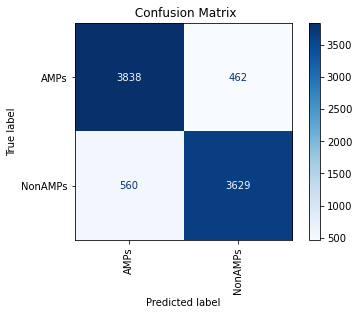

In [21]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['AMPs', 'NonAMPs']

disp = plot_confusion_matrix(classifier, X_test, y_test,
                            display_labels = class_names,
                            cmap=plt.cm.Blues, xticks_rotation='vertical')

disp.ax_.set_title(" Confusion Matrix")

print(disp.confusion_matrix)
plt.grid(False)
plt.show()

In [15]:
#import scikitplot as skplt
#skplt.metrics.plot_roc([], y_pred)

In [ ]:
y_pred

In [ ]:
y_test.to_numpy()

# Custom Build

In [ ]:
## 1. Evotuning with Optuna
PROJECT_NAME = "temp"
n_epochs_config = {"low": 1, "high": 1}
lr_config = {"low": 1e-5, "high": 1e-3}
study, evotuned_params = evotune(
    sequences=X_test,
    params=None,
    proj_name=PROJECT_NAME,
    out_dom_seqs=X_val,
    n_trials=2,
    n_splits=2,
    n_epochs_config=n_epochs_config,
    learning_rate_config=lr_config,
    epochs_per_print=1,
)

dump_params(evotuned_params, PROJECT_NAME)
print("Evotuning done! Find output weights in", PROJECT_NAME)
print(study.trials_dataframe())


In [ ]:
from jax.experimental import stax
from jax.experimental.stax import Dense, Relu, Sigmoid

from jax_unirep.layers import mLSTM1900, mLSTM1900_AvgHidden

init_fun, apply_fun = stax.serial(
    mLSTM1900(),
    mLSTM1900_AvgHidden(),
    # Add two layers, one dense layer that results in 512-dim activations
    Dense(512), Relu(),
    # And then a linear layer to produce a 1-dim activation
    Dense(1)
)